In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
!pip install imblearn

In [3]:
df = pd.read_csv('card_transdata.csv')

In [4]:
kolone = df.drop(['fraud'], axis = 1).columns
kolone

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [5]:
df.shape

(1000000, 8)

In [6]:
df.isna().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

In [7]:
X = df.drop(['fraud'], axis = 1)
X.shape

(1000000, 7)

In [8]:
y = df['fraud']
y.shape

(1000000,)

In [9]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
y.unique()

array([0., 1.])

In [11]:
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


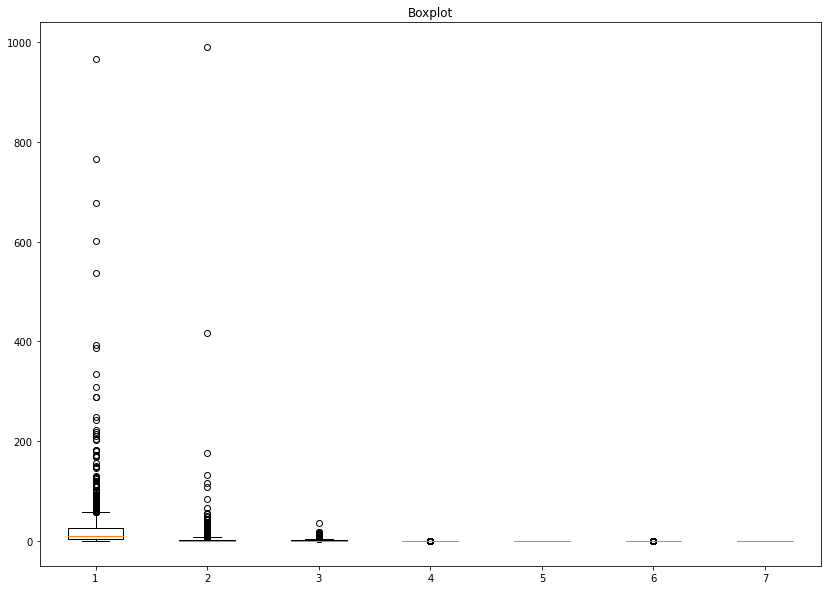

In [12]:
fig = plt.figure(figsize=(14, 10))

plt.boxplot(X[:1000])
plt.title('Boxplot')
#plt.bar(kolone, kolone.values)
plt.show()

### Matrica korelacija

<AxesSubplot:>

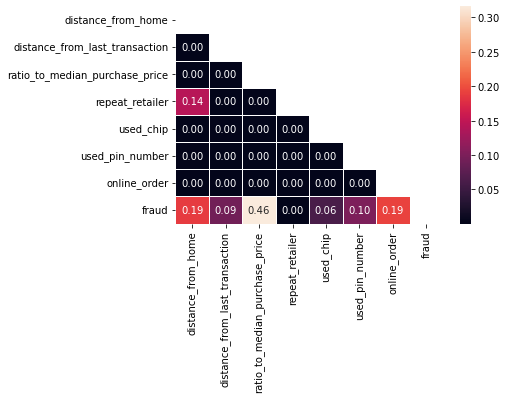

In [13]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

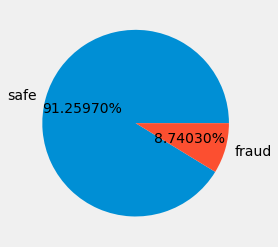

In [14]:
tforan=y.value_counts()

plt.style.use("fivethirtyeight")
plt.pie(tforan,labels=['safe','fraud'],autopct="%1.5f%%")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state=42)

In [16]:
normalizer = Normalizer()
scaler = StandardScaler()

In [17]:
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [18]:
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [19]:
pd.DataFrame(X_train_normalized).describe()

,0,1,2,3,4,5,6
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,0.807649,0.235789,0.176265,0.082600,0.042459,0.012110,0.079922
std,0.267766,0.300108,0.225828,0.083739,0.094138,0.053152,0.120072
min,0.000164,0.000002,0.000022,0.000000,0.000000,0.000000,0.000000
25%,0.715973,0.019739,0.025567,0.019029,0.000000,0.000000,0.000000
50%,0.949080,0.086508,0.078767,0.055333,0.000000,0.000000,0.031258
75%,0.993584,0.347849,0.229773,0.121256,0.038935,0.000000,0.109654
max,1.000000,1.000000,0.999995,0.463995,0.976186,0.965337,0.994736


In [20]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### Vizelizacija podataka

In [21]:
pca1 = PCA(n_components = 2)

In [22]:
X_train_pca1 = pca1.fit_transform(X_train_normalized)
X_test_pca1 = pca1.transform(X_test_normalized)

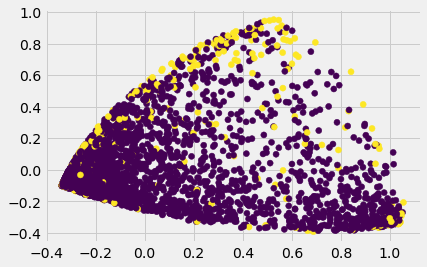

In [23]:
class_names=y
scatter = plt.scatter(X_train_pca1[:4000,0], X_train_pca1[:4000,1], c=y_train[:4000])
plt.show()

In [24]:
pca2 = PCA(n_components = 3)

In [25]:
X_train_pca2 = pca2.fit_transform(X_train_normalized)
X_test_pca2 = pca2.transform(X_test_normalized)

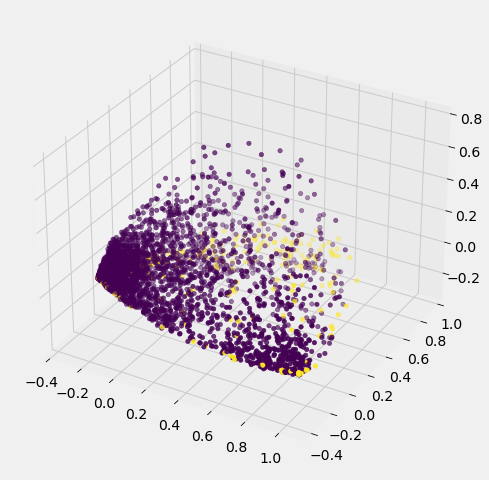

In [26]:
class_names=y

scatter = plt.figure(figsize=(9,8)).add_subplot(111, projection='3d')
scatter.scatter(X_train_pca2[:4000, 0], X_train_pca2[:4000, 1], X_train_pca2[:4000, 2], c=y_train[:4000])

plt.show()

### DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, get_scorer_names

In [28]:
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [10, 15, 20]
}

In [29]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = param_tree, verbose = 2)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   1.6s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   1.7s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   1.8s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   1.6s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   1.8s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=15; total time=   1.8s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=15; total time=   1.5s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=15; total time=   1.9s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=15; total time=   1.9s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=15; total time=   1.8s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=20; total time=   1.8s
[CV] END ..criterion=gini, max_depth=2, min_sam

[CV] END criterion=entropy, max_depth=2, min_samples_split=20; total time=   2.1s
[CV] END criterion=entropy, max_depth=2, min_samples_split=20; total time=   2.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=20; total time=   1.9s
[CV] END criterion=entropy, max_depth=2, min_samples_split=20; total time=   2.1s
[CV] END criterion=entropy, max_depth=4, min_samples_split=10; total time=   3.2s
[CV] END criterion=entropy, max_depth=4, min_samples_split=10; total time=   2.9s
[CV] END criterion=entropy, max_depth=4, min_samples_split=10; total time=   3.2s
[CV] END criterion=entropy, max_depth=4, min_samples_split=10; total time=   3.3s
[CV] END criterion=entropy, max_depth=4, min_samples_split=10; total time=   3.2s
[CV] END criterion=entropy, max_depth=4, min_samples_split=15; total time=   3.2s
[CV] END criterion=entropy, max_depth=4, min_samples_split=15; total time=   3.1s
[CV] END criterion=entropy, max_depth=4, min_samples_split=15; total time=   2.9s
[CV] END criteri

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_split': [10, 15, 20]},
             verbose=2)

In [31]:
params = grid_search.best_params_
score = grid_search.best_score_

print(f'Najbolji parametri su {params} i accuracy je {score}')

Najbolji parametri su {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10} i accuracy je 0.9999877777777778


In [32]:
model_tree = DecisionTreeClassifier(criterion=params['criterion'],
                               max_depth = params['max_depth'], min_samples_split=params['min_samples_split'])

In [33]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=10)

In [34]:
y_pred = model_tree.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[91260,     0],
       [    1,  8739]], dtype=int64)

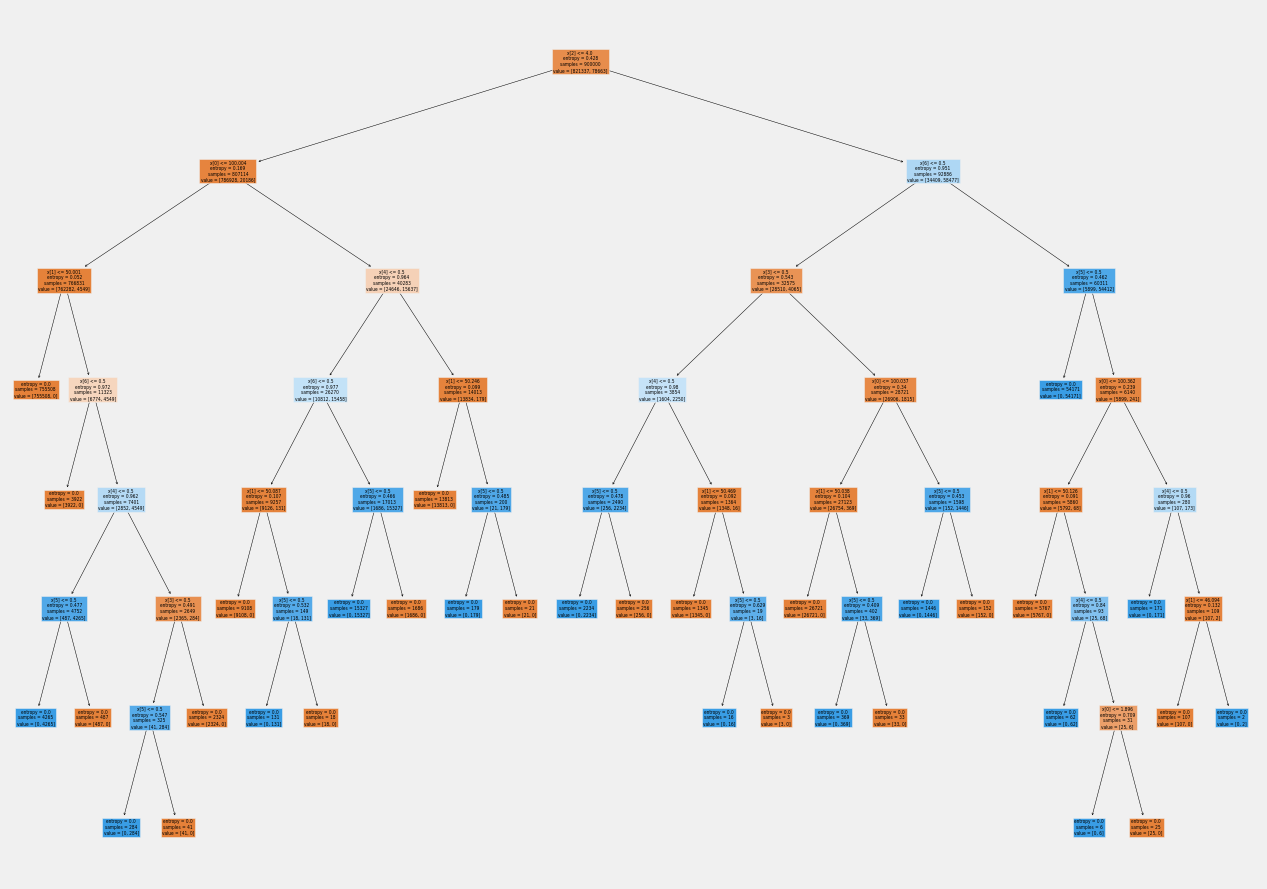

In [36]:
plt.figure(figsize=(20,15))
drvo = plot_tree(model_tree, filled = True)

In [37]:
print('test accuracy')
print(accuracy_score(y_test, y_pred))
print('-'*15)
print('test f1 score')
print(f1_score(y_test, y_pred))

test accuracy
0.99999
---------------
test f1 score
0.9999427884890439


### Balansiranje podataka i pravljenje neuronskih mreza za par algoritama balansiranja

In [38]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

In [39]:
def imbalanced(X_train, y_train, sampler):
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f'X_resampled.shape = {X_resampled.shape}')
    print(f'y value counts = \n{y_resampled.value_counts()}')
    
    return X_resampled, y_resampled

In [40]:
sampler = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = imbalanced(X_train_normalized, y_train, sampler)


X_resampled.shape = (1642674, 7)
y value counts = 
0.0    821337
1.0    821337
Name: fraud, dtype: int64


In [41]:
model_MLP_smote = MLPClassifier(hidden_layer_sizes=(5,4,3), max_iter=500, random_state=42)

In [42]:
model_MLP_smote.fit(X_resampled_smote, y_resampled_smote)

MLPClassifier(hidden_layer_sizes=(5, 4, 3), max_iter=500, random_state=42)

In [43]:
y_pred_smote = model_MLP_smote.predict(X_test_normalized)

In [44]:
sampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = imbalanced(X_train_normalized, y_train, sampler)

X_resampled.shape = (1642674, 7)
y value counts = 
0.0    821337
1.0    821337
Name: fraud, dtype: int64


In [45]:
model_MLP_over = MLPClassifier(hidden_layer_sizes=(5,4,3), max_iter=500, random_state=42)

In [46]:
model_MLP_over.fit(X_resampled_over, y_resampled_over)

MLPClassifier(hidden_layer_sizes=(5, 4, 3), max_iter=500, random_state=42)

In [47]:
y_pred_over = model_MLP_over.predict(X_test_normalized)

In [48]:
sampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = imbalanced(X_train_normalized, y_train, sampler)

X_resampled.shape = (157326, 7)
y value counts = 
0.0    78663
1.0    78663
Name: fraud, dtype: int64


In [49]:
model_MLP_under = MLPClassifier(hidden_layer_sizes=(5,4,3), max_iter=500, random_state=42)

In [50]:
model_MLP_under.fit(X_resampled_under, y_resampled_under)

MLPClassifier(hidden_layer_sizes=(5, 4, 3), max_iter=500, random_state=42)

In [51]:
y_pred_under = model_MLP_under.predict(X_test_normalized)

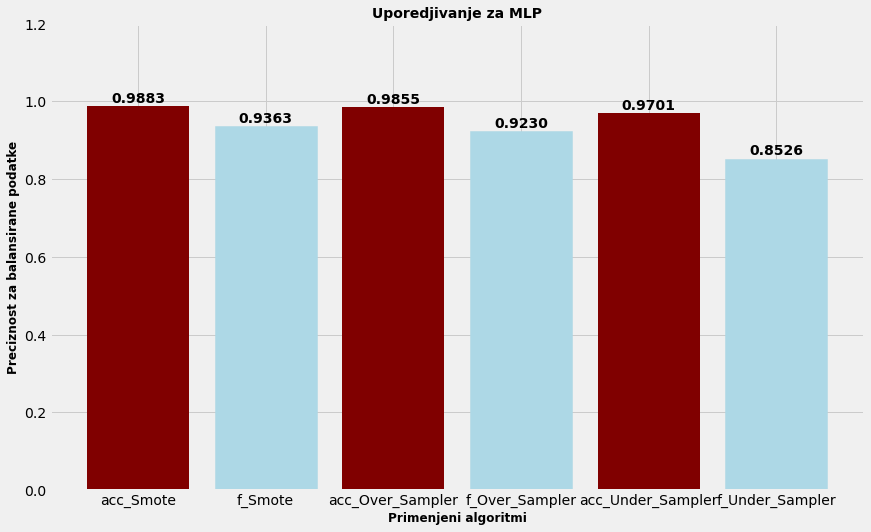

In [52]:
acc_smote = accuracy_score(y_test, y_pred_smote)
acc_over = accuracy_score(y_test, y_pred_over)
acc_under = accuracy_score(y_test, y_pred_under)
f_smote = f1_score(y_test, y_pred_smote)
f_over = f1_score(y_test, y_pred_over)
f_under = f1_score(y_test, y_pred_under)

fig = plt.figure(figsize = (13, 8))

scores = [acc_smote, f_smote, acc_over, f_over, acc_under, f_under]
samplers = ['acc_Smote', 'f_Smote', 'acc_Over_Sampler', 'f_Over_Sampler', 'acc_Under_Sampler', 'f_Under_Sampler']

bar = plt.bar(samplers, scores, color = 'maroon')

bar[1].set_color('lightblue')
bar[3].set_color('lightblue')
bar[5].set_color('lightblue')

plt.xlabel("Primenjeni algoritmi", fontsize = 12, fontweight='bold')
plt.ylabel("Preciznost za balansirane podatke", fontsize = 12, fontweight='bold')
plt.title("Uporedjivanje za MLP", fontsize=14, fontweight='bold')
plt.ylim([0,1.2])
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()



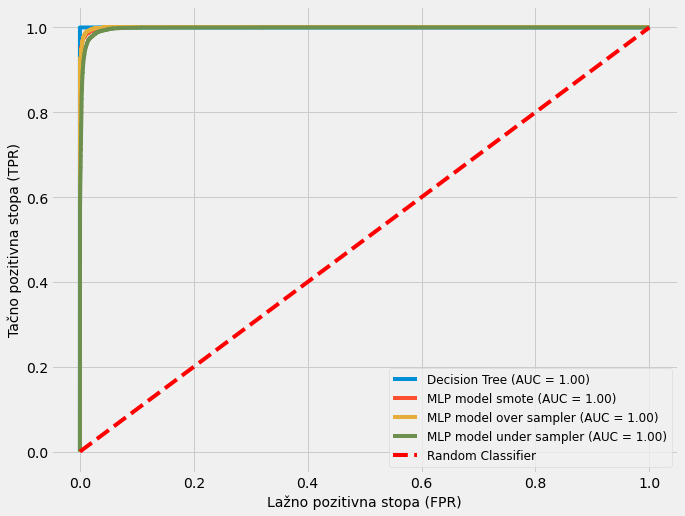

In [53]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

fig, ax = plt.subplots(figsize=(10, 8))

# ROC - Decision Tree model
roc_display1 = RocCurveDisplay.from_estimator(model_tree, X_test, y_test, ax=ax, name='Decision Tree')

# ROC - MLP model smote
roc_display2 = RocCurveDisplay.from_estimator(model_MLP_smote, X_test_normalized, y_test, ax=ax, name='MLP model smote')

# ROC - MLP model over sampler
roc_display3 = RocCurveDisplay.from_estimator(model_MLP_over, X_test_normalized, y_test, ax=ax, name='MLP model over sampler')

# ROC - MLP model under sampler
roc_display4 = RocCurveDisplay.from_estimator(model_MLP_under, X_test_normalized, y_test, ax=ax, name='MLP model under sampler')

plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend(loc='lower right', fontsize=12)

plt.xlabel('Lažno pozitivna stopa (FPR)', fontsize=14)
plt.ylabel('Tačno pozitivna stopa (TPR)', fontsize=14)

plt.show()

In [54]:
from sklearn.model_selection import KFold, cross_val_score

In [55]:
kfold = KFold(shuffle=True)

In [56]:
score_smote = cross_val_score(model_MLP_smote, X_test_normalized, y_test, cv=kfold, scoring='accuracy')

In [57]:
score_smote.mean()

0.9831100000000002